In [1]:
import mrigutilities as mu
import pandas as pd
import datetime,re
import kite.kite_trade as zkite
# import tradingDB_GUI as tdbg
import kite.kite_account as ka
import numpy as np
kite_object = ka.kite_account()

expiry1 = mu.last_thursday_of_month(datetime.date.today())
expiry2 = mu.last_thursday_of_month(expiry1 + datetime.timedelta(days=30))
expiry3 = mu.last_thursday_of_month(expiry2 + datetime.timedelta(days=30))
expiry1,expiry2, expiry3
session = mu.getKiteSession()
today = datetime.datetime.now()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


connection active


In [ ]:
ins = session.instruments(exchange='NFO')
ins= pd.DataFrame(ins)

In [ ]:
def getExpiry(**kwargs):
    engine = mu.sql_engine()
    scrip_list = []
    instrument_list = []
    args = kwargs
    print(args)
    if 'scrip' in kwargs.keys():
        scrip_list.append(kwargs['scrip'])
    if 'scriplist' in kwargs.keys():
        scrip_list = scrip_list + kwargs['scriplist']
    if 'instrument' in kwargs.keys():
        instrument_list.append(kwargs['instrument'])
    if 'instrumentlist' in kwargs.keys():
        instrument_list = instrument_list + kwargs['instrumentlist']    

    scrip_list = scrip_list if len(scrip_list) > 0 else ['-99']
    instrument_list = instrument_list if len(instrument_list) > 0 else ['-99']
    
    scrip_list = str(scrip_list).replace('[', '(').replace(']', ')')
    instrument_list = str(instrument_list).replace('[', '(').replace(']', ')')
    
    sql = "select instrument_token,tradingsymbol,name,expiry,instrument_type from market_instruments \
    where (name in {} or tradingsymbol in {}) \
    and instrument_date = (select max(instrument_date) from market_instruments)".format(scrip_list, instrument_list)

    expiry_df = pd.read_sql(sql,engine)

    # print(expiry_df)
    return expiry_df

# getExpiry(scrip='NIFTY',instrumentlist=['BANKNIFTY24JUNFUT'])


In [40]:
df = mu.getExpiry(scriplist=['NIFTY'])
qt = {}
for expiry in sorted(set(df['expiry'])):
    qt = qt | session.quote(df[df['expiry'] == expiry]['instrument_token'])
# qt = session.quote(df['instrument_token'])
# len(df['instrument_token'])
qt = pd.DataFrame(qt).T
qt

{'scriplist': ['NIFTY']}


,instrument_token,timestamp,last_trade_time,last_price,last_quantity,buy_quantity,sell_quantity,volume,average_price,oi,oi_day_high,oi_day_low,net_change,lower_circuit_limit,upper_circuit_limit,ohlc,depth
12014082,12014082,2024-05-24 16:53:29,2024-05-24 15:29:59,23015.4,50,281350,73750,5499025,23019.69,11064850,11356875,10240925,0,20717.65,25321.6,"{'open': 23000, 'high': 23089.9, 'low': 22953,...","{'buy': [{'price': 23015.5, 'quantity': 200, '..."
14545666,14545666,2024-05-24 16:54:19,2024-05-24 14:25:53,2987.85,25,6375,6950,1075,2972.28,27225,27625,27225,0,2465.9,3509.85,"{'open': 3003.35, 'high': 3012.4, 'low': 2893....","{'buy': [{'price': 2952.15, 'quantity': 50, 'o..."
14545922,14545922,2024-05-24 16:54:19,2024-05-24 15:29:54,0.85,400,1459750,43625,9267075,0.83,3093925,3243100,2148250,0,0.05,2.3,"{'open': 1.5, 'high': 1.55, 'low': 0.65, 'clos...","{'buy': [{'price': 0.85, 'quantity': 21100, 'o..."
14546178,14546178,2024-05-24 16:54:19,2024-05-24 15:25:36,2903.05,100,7300,6800,6925,2906.86,225750,229675,225750,0,2382.55,3423.6,"{'open': 2887.25, 'high': 2980, 'low': 2860.7,...","{'buy': [{'price': 2898.55, 'quantity': 75, 'o..."
14546434,14546434,2024-05-24 16:54:19,2024-05-24 15:29:59,0.95,250,651675,28125,2456450,1.07,2114025,2227875,2114025,0,0.05,2.6,"{'open': 1.8, 'high': 1.8, 'low': 0.8, 'close'...","{'buy': [{'price': 0.95, 'quantity': 26850, 'o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17353474,17353474,2024-05-24 16:55:15,2023-11-07 13:33:12,0,1320,0,0,0,0,0,0,0,0,0.15,3411.7,"{'open': 0, 'high': 0, 'low': 0, 'close': 1160...","{'buy': [{'price': 0, 'quantity': 0, 'orders':..."
17353730,17353730,2024-05-24 16:55:15,2023-11-30 14:41:02,0,1320,0,0,0,0,0,0,0,0,2017.95,6858,"{'open': 0, 'high': 0, 'low': 0, 'close': 4437...","{'buy': [{'price': 0, 'quantity': 0, 'orders':..."
17353986,17353986,2024-05-24 16:55:15,2023-11-30 15:10:30,0,1320,1800,0,0,0,0,0,0,0,0.05,3875.65,"{'open': 0, 'high': 0, 'low': 0, 'close': 1413...","{'buy': [{'price': 6.45, 'quantity': 1800, 'or..."
17354242,17354242,2024-05-24 16:55:15,2023-11-30 14:54:53,0,1320,0,0,0,0,0,0,0,0,1527.5,6526.8,"{'open': 1.15, 'high': 3.6, 'low': 0.3, 'close...","{'buy': [{'price': 0, 'quantity': 0, 'orders':..."


In [5]:
# oc = mu.kite_OC_new(['BANKNIFTY'])
# oc.head(5)
mu.getStockQuote('NIFTY BANK')

[*********************100%%**********************]  1 of 1 completed


{'lastPrice': 51328.1484375,
 'high': 51568.8984375,
 'low': 51044.3984375,
 'open': 51050.05078125,
 'time': '2024-10-28 15:29:00',
 'prev_close': None,
 'high52': 54375.35,
 'low52': 42700.95}

In [10]:
import yfinance as yf

price = yf.download('^NSEI',period='1d',interval='1m')
price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-10-28 09:15:00+05:30,24275.349609,24288.900391,24239.900391,24250.949219,24250.949219,0
2024-10-28 09:16:00+05:30,24252.550781,24263.849609,24235.250000,24263.849609,24263.849609,0
2024-10-28 09:17:00+05:30,24265.150391,24270.500000,24245.849609,24247.800781,24247.800781,0
2024-10-28 09:18:00+05:30,24244.400391,24248.400391,24232.699219,24243.050781,24243.050781,0
2024-10-28 09:19:00+05:30,24243.300781,24251.650391,24241.000000,24249.650391,24249.650391,0
2024-10-28 09:20:00+05:30,24248.800781,24255.949219,24231.050781,24249.449219,24249.449219,0
2024-10-28 09:21:00+05:30,24249.650391,24258.800781,24239.000000,24243.849609,24243.849609,0
2024-10-28 09:22:00+05:30,24243.849609,24270.599609,24243.849609,24270.599609,24270.599609,0
2024-10-28 09:23:00+05:30,24269.050781,24273.199219,24261.300781,24264.400391,24264.400391,0


In [56]:
# ce = oc[oc['instrument_type'] == 'CE']
# pe = oc[oc['instrument_type'] == 'PE']
# newoc = pd.merge(ce,pe,on=['strike'],how='inner',suffixes=('_ce','_pe'))
# newoc[[	'volume_ce','oi_ce',	'last_price_ce','strike',	'last_price_pe'	, 'oi_pe',	'volume_pe']]
oc                

,tradingsymbol,name,expiry,timestamp,last_trade_time,last_price,last_quantity,buy_quantity,sell_quantity,volume,average_price,oi,oi_day_high,oi_day_low,net_change,lower_circuit_limit,upper_circuit_limit,ohlc,depth
instrument_token,,,,,,,,,,,,,,,,,,,
14571778,NIFTY24MAY22600CE,NIFTY,2024-05-30,2024-05-24 17:12:25,2024-05-24 15:29:57,452,25,31975,18525,1316250,457.09,1302025,1425450,1302025,0,10.65,900.05,"{'open': 425, 'high': 516.7, 'low': 406.9, 'cl...","{'buy': [{'price': 451.95, 'quantity': 250, 'o..."
14572034,NIFTY24MAY22600PE,NIFTY,2024-05-30,2024-05-24 17:12:25,2024-05-24 15:29:59,34.8,100,134400,480925,22498250,43.91,4236925,4646175,3724125,0,0.05,106.2,"{'open': 52.15, 'high': 59.85, 'low': 30.4, 'c...","{'buy': [{'price': 34.85, 'quantity': 1000, 'o..."
14571266,NIFTY24MAY22550CE,NIFTY,2024-05-30,2024-05-24 17:12:25,2024-05-24 15:29:51,495.5,25,16625,9625,253975,500.4,166275,219850,166275,0,35.85,955.45,"{'open': 479.85, 'high': 561.25, 'low': 448.1,...","{'buy': [{'price': 492.1, 'quantity': 100, 'or..."
14571522,NIFTY24MAY22550PE,NIFTY,2024-05-30,2024-05-24 17:12:25,2024-05-24 15:29:59,28.95,25,48400,104300,8342275,37.04,691775,888000,600700,0,0.05,84.8,"{'open': 45, 'high': 52.75, 'low': 25.6, 'clos...","{'buy': [{'price': 29.2, 'quantity': 1000, 'or..."
14572290,NIFTY24MAY22650CE,NIFTY,2024-05-30,2024-05-24 17:12:25,2024-05-24 15:29:54,410.05,25,32650,11375,380775,412.39,283250,334050,283250,0,0.05,832.85,"{'open': 390.9, 'high': 471.35, 'low': 365.8, ...","{'buy': [{'price': 406.8, 'quantity': 50, 'ord..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663746,NIFTY25JUN23000CE,NIFTY,2025-06-26,2024-05-24 17:12:35,2021-03-25 09:30:16,0,34000,0,0,0,0,0,0,0,0,892.7,3791.3,"{'open': 0, 'high': 0, 'low': 0, 'close': 2003...","{'buy': [{'price': 0, 'quantity': 0, 'orders':..."
9675266,NIFTY25JUN23000PE,NIFTY,2025-06-26,2024-05-24 17:12:35,2024-05-17 15:22:33,624.65,25,1100,625,0,0,1400,0,0,0,0.05,1687.95,"{'open': 0, 'high': 0, 'low': 0, 'close': 930}","{'buy': [{'price': 700, 'quantity': 50, 'order..."
15006210,NIFTY25JUN22000CE,NIFTY,2025-06-26,2024-05-24 17:12:35,2021-07-26 10:20:28,0,1851,0,0,0,0,0,0,0,0,1644.95,4377.75,"{'open': 0, 'high': 0, 'low': 0, 'close': 2088...","{'buy': [{'price': 0, 'quantity': 0, 'orders':..."


In [54]:
'''
Option Chain Contruction and Retrieval from Kite Connect APIs

Expiry is filtered from ins list
'''

def kite_OC(scrips=['NIFTY'],expiry=None):
    session = mu.getKiteSession()
    # ins = session.instruments(exchange='NFO')
    if expiry is None:
        expiry = [mu.last_thursday_of_month(datetime.date.today())]
    # inspd = pd.DataFrame(ins)

    inspd = mu.getExpiry(scriplist = scrips)
    # print('EXXPIRY DF\n',inspd['instrument_token'])
    # inspd = inspd[(inspd['name'] == scrip) & (inspd['expiry'] == expiry) & (inspd['strike'] >= 18000) & (inspd['strike'] <= 20500) ][['tradingsymbol','strike']]
    # inspd = inspd[inspd['name'].isin(scrip)]
    # # print(inspd)
    # inspd = inspd[inspd['expiry'].isin(expiry)]
    # print(inspd)
    # inspd = inspd[(inspd['strike'] > 0)][['tradingsymbol', 'strike','expiry']]

    

    # inspd = inspd[(inspd['name'].isin(scrips)) & (inspd['expiry'].isin(expiry)) & (inspd['strike'] > 0)][['name','tradingsymbol', 'strike','expiry','instrument_type']]
    # inspd['tradingsymbol'] = 'NFO:' + inspd['tradingsymbol']
    # inspd.set_index('tradingsymbol', inplace=True)
    # inslist= []
    qt = {}
    for scrip in scrips:
        print(scrip)
        for exp in sorted(set(inspd['expiry'])):
            qt = qt | session.quote(inspd[(inspd['name'] == scrip) & (inspd['expiry'] == exp)]['instrument_token'])
            # inslist_i = list(inspd[(inspd['name'] == scrip) & (inspd['expiry'] == exp)].index)
            # inslist.append(inslist_i[int(len(inslist_i) / 2 - len(inslist_i) / 4):int(len(inslist_i) / 2 + len(inslist_i) / 4)])
    # qt = None
    # try:
    #     # qt = session.quote(inslist)
    #     qt = session.quote(inspd['instrument_token'])
    # except:
    #     pass
    if qt is not None:
        oc = pd.DataFrame(qt).T
        
        # oc.reset_index(inplace=True)
        # oc.drop('index',inplace=True)
        oc.set_index('instrument_token',inplace=True)
        inspd.set_index('instrument_token',inplace=True)
        print('QUOTES DF\n',oc)
        inspd.index = inspd.index.map(str)
        oc.index = oc.index.map(str)
        
        # oc.index.name = 'tradingsymbol'
        # oc1 = oc.merge(inspd, on='instrument_token',how='inner')#[['instrument_token','name','strike', 'oi', 'volume', 'last_price','expiry','instrument_type']]
        oc1 = pd.merge(inspd, oc, left_index=True, right_index=True)
        return oc1
    else:
        return None


In [ ]:
def price(scrip):
    price = None
    yahoo_map = {'NIFTY':'^NSEI','BANKNIFTY':'^NSEBANK'}
    yahooid = scrip+'.NS'
    if (scrip == 'NIFTY' or scrip == 'BANKNIFTY'):
        yahooid = yahoo_map[scrip]
    if len(yahooid) > 0:
        if yahooid is not None:
            try:
                price = yf.download(yahooid,period='1d').Close.values[0]
            except:
                None
                
    return price


def num_pos(s):
    return re.search(r"\d", s).start()
col_map = {'Instrument':'instrument','Qty.':'qty','Avg.':'avg_price','LTP':'ltp','P&L':'pnl'}

def showAnalytics_live():
    def highlight(s):
        if s.l_s == '':
            return ['background-color: yellow'] * len(s)
        else:
            return ['background-color: white'] * len(s)

    volfile = 'vol.csv'
    vol_pd = pd.read_csv(volfile)
    vol_pd.drop(columns=['Date', 'Underlying Close Price (A)', 'Underlying Previous Day Close Price (B)',
                         'Underlying Log Returns (C) = LN(A/B)', 'Previous Day Underlying Volatility (D)'],
                inplace=True)
    vol_pd.set_index('Symbol', inplace=True)
    vol_pd.rename(columns={'Underlying Annualised Volatility (F) = E*Sqrt(365)': 'vol'}, inplace=True)
    hist_vol = vol_pd.to_dict()

    hist_vol = hist_vol['vol']

    hist_vol['NIFTY'] = 0.09
    hist_vol['BANKNIFTY'] = 0.14
    sql = 'select * from live_positions where snapshot = \
    (select snapshot from live_positions where pos_date = \
    (select pos_date from live_positions order by pos_date desc limit 1)\
    order by snapshot desc limit 1)'

    live_positions = kite_object.getPositions()
#     print(live_positions)

    positions = live_positions.loc[live_positions['exchange'] == 'NFO',
    ['tradingsymbol', 'instrument_token', 'product', 'quantity', 'average_price', 'last_price', 'pnl']]
    positions.rename(columns={'tradingsymbol':'Instrument',
                              'quantity' : 'qty',
                              'average_price' : 'avg_price',
                              'last_price':'ltp'},inplace=True)
    positions['type'] = positions['Instrument'].apply(lambda x: x[-2:])
    positions['type'] = positions['type'].apply(lambda x: 'FUT' if (x == 'UT') else x)
    positions['scrip'] = positions['Instrument'].apply(lambda x: x[:num_pos(x)])
    positions['strike'] = positions['Instrument'].apply(lambda x: x[num_pos(x) + 5:-2])
    positions['strike'] = positions['strike'].apply(lambda x: 0 if (x == 'F') else x)
    positions['strike'] = pd.to_numeric(positions['strike'],errors='ignore')
    positions['expiry'] = positions['Instrument'].apply(
        lambda x: datetime.datetime.strptime(x[num_pos(x):num_pos(x) + 5] + '27', '%y%b%d'))
    # positions.drop(columns=['Chg.', 'Product'], inplace=True)
    positions.rename(columns=col_map, inplace=True)
    positions['pos_date'] = today

    # positions = pd.read_sql(sql, engine)
    positions['l_s'] = positions[['type', 'qty']].apply(lambda x: 'Short' if (
                ((x['type'] == 'CE' or x['type'] == 'FUT') and x['qty'] < 0) or (
                    x['type'] == 'PE' and x['qty'] > 0)) else 'Long', axis=1)

    positions['orig_liab'] = positions[['type', 'qty', 'avg_price']].apply(
        lambda x: x['qty'] * x['avg_price'] if (x['qty'] < 0 and x['type'] != 'FUT') else 0, axis=1)
    positions['curr_liab'] = positions[['type', 'qty', 'ltp']].apply(
        lambda x: x['qty'] * x['ltp'] if (x['qty'] < 0 and x['type'] != 'FUT') else 0, axis=1)
    positions['wtd_strike'] = positions[['type', 'qty', 'strike','avg_price']].apply(
        lambda x: np.absolute(x['qty'] * x['strike']) if (x['type'] != 'FUT') else np.absolute(x['qty'] * x['avg_price']), axis=1)
    positions['abs_qty'] = np.absolute(positions['qty'])
    positions['max_profit'] = positions['orig_liab'].apply(lambda x: -x if (x < 0) else 'infinite')

    positions['breakeven'] = positions[['type', 'strike','avg_price']].apply(
        lambda x: (x['avg_price']+x['strike']) if (x['type'] != 'PE') else (x['strike'] - x['avg_price']), axis=1)

    positions['max_loss'] = positions[['type', 'qty', 'avg_price', 'orig_liab']].apply(
        lambda x: -x['qty'] * x['avg_price'] if (x['orig_liab'] == 0 and x['type'] != 'FUT') else 'infinite', axis=1)
    positions['spot'] = positions['scrip'].apply(lambda x: price(x))
    positions['histVol'] = positions['scrip'].apply(lambda x: float(hist_vol[x]))

    positions['impVol'] = -1
    positions['impVol'] = positions[['type', 'spot', 'strike', 'expiry', 'ltp']].apply(
        lambda x: mu.impVol(x['spot'], x['strike'], abs((x['expiry'] - today).days) / 365, x['ltp'],
                                       opt=x['type']), axis=1)
    positions['impVol'] = positions[['impVol', 'histVol']].apply(
        lambda x: x['histVol'] if (x['impVol'] == -1) else x['impVol'], axis=1)
    positions['delta (D)'] = positions[['type', 'qty', 'spot', 'strike', 'expiry', 'impVol']].apply(
        lambda x: x['qty'] * mu.bs_delta(x['spot'], x['strike'], abs((x['expiry'] - today).days) / 365,
                                                    x['impVol'], opt=x['type']), axis=1)
    positions['theta (T)'] = positions[['type', 'qty', 'spot', 'strike', 'expiry', 'impVol']].apply(
        lambda x: x['qty'] * mu.bs_theta(x['spot'], x['strike'], abs((x['expiry'] - today).days) / 365,
                                                    x['impVol'], opt=x['type']), axis=1)
    positions['T/D'] = positions[['qty', 'delta (D)', 'theta (T)']].apply(
        lambda x: abs(x['theta (T)'] / x['delta (D)']) if (x['delta (D)'] != 0 and x['qty'] < 0) else 0, axis=1)

    positions['underlying'] = positions[['scrip']].apply(lambda x: kite_object.getQuoteLive(x['scrip'])['last_price'],axis=1)
    positions['Intrinsic Value'] = positions[['strike','type','qty','underlying']].apply(
        lambda x : x['qty']* max((x['underlying'] - x['strike']),0) if (x['type'] == 'CE') else
        (x['qty']* max((x['strike'] - x['underlying']),0) if (x['type'] == 'PE') else 0),axis=1)
    positions['Time Value'] = positions[['type','pnl','Intrinsic Value']].apply(
        lambda x : (x['pnl'] - x['Intrinsic Value']) if (x['type'] != 'FUT') else 0 ,axis=1)

    positions['strike'] = positions['strike'].map('{:,.0f}'.format)

    df1 = positions.groupby(by=['scrip', 'instrument', 'l_s','strike'], as_index=False)[
        'qty', 'orig_liab', 'curr_liab', 'delta (D)', 'theta (T)', 'T/D', 'pnl','Intrinsic Value','Time Value','wtd_strike','abs_qty','breakeven'].sum().fillna(0).round()


    df2 = df1.groupby(by=['scrip', 'l_s'], as_index=False)[
        'qty', 'strike', 'orig_liab', 'curr_liab', 'delta (D)', 'theta (T)', 'T/D', 'pnl','Intrinsic Value','Time Value','wtd_strike','abs_qty','breakeven'].sum().fillna(
        0).round().assign(instrument='')

    df3 = df1.groupby(by=['scrip'], as_index=False)[
        'qty', 'orig_liab', 'curr_liab', 'delta (D)', 'theta (T)', 'T/D', 'pnl','Intrinsic Value','Time Value','wtd_strike','abs_qty','breakeven'].sum().fillna(
        0).round().assign(l_s='')


    df = (pd.concat([df1, df2, df3])
          .reindex(df1.columns, axis=1)
          .fillna('')
          .sort_values(['scrip', 'l_s','instrument'], ascending=True, ignore_index=True))

    scrips = set(list(df['scrip']))
    df['pivot_strike'] = 0
    for scrip in scrips:
        df.loc[((df['scrip'] == scrip) & (df['l_s'] == 'Long')),'pivot_strike'] = df[((df['scrip'] == scrip) & (df['l_s'] == 'Long'))]['wtd_strike'].sum()/df[((df['scrip'] == scrip) & (df['l_s'] == 'Long'))]['abs_qty'].sum()
        df.loc[((df['scrip'] == scrip) & (df['l_s'] == 'Short')),'pivot_strike'] = df[((df['scrip'] == scrip) & (df['l_s'] == 'Short'))]['wtd_strike'].sum()/df[((df['scrip'] == scrip) & (df['l_s'] == 'Short'))]['abs_qty'].sum()

    for scrip in df['scrip']:
        # sec = scrip
        # if scrip == 'NIFTY':
        #     sec = 'NIFTY 50'
        # elif scrip == 'BANKNIFTY':
        #     sec = 'NIFTY BANK'
        # print(scrip+'-------->'+sec)
        df.loc[((df['scrip'] == scrip) & (df['l_s'] == '')),'instrument'] = 'Last Price ---> '+str(kite_object.getQuoteLive(scrip)['last_price'])

    # df.set_index('scrip',inplace=True)
    # print(positions.groupby(by=['scrip']).sum()[['qty','orig_liab','curr_liab','delta','theta','pnl']])

    # df.loc[df['l_s'] == '',['strike']] = ''
    for col in ['qty', 'orig_liab', 'curr_liab', 'delta (D)', 'theta (T)', 'T/D', 'pnl','Intrinsic Value','Time Value','breakeven','pivot_strike']:
        df[col] = df[col].map('{:,.0f}'.format)
    df.loc[df['pivot_strike'] == '0','pivot_strike'] = ''
    df.loc[df['pivot_strike'] == '','breakeven'] = ''
    df.loc[df['instrument'] == '', 'breakeven'] = ''
    df.drop(columns=['wtd_strike','abs_qty'],axis=1,inplace=True)

    # print(df.columns)
    # df.rename(columns=ms.trade_display_analytics, inplace=True)

    return [positions, df]


In [ ]:
a = showAnalytics_live()

In [ ]:
to_date = datetime.date.today()
from_date = to_date - datetime.timedelta(days=70)
ins[(ins['name'] == 'USDINR') & (ins['instrument_type'] == 'FUT')].sort_values(by='expiry').head(2)
token = ins[(ins['name'] == 'USDINR') & (ins['instrument_type'] == 'FUT')].sort_values(by='expiry').head(1)['instrument_token'].values[0]
str(token)
# dt = session.historical_data(str(token),from_date,to_date,'day')
# dt

In [ ]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
assets = pytesseract.image_to_string(Image.open('tapo.png'))
liabilities = pytesseract.image_to_string(Image.open('tapo1.png'))
print(assets)
print(liabilities)

In [ ]:
assets.split('\n')[3]

In [ ]:
last_price = pd.DataFrame(session.quote('NSE:NIFTY 50'))['NSE:NIFTY 50']['last_price']
last_price
oc['itm x oi'] = oc[['strike', 'tradingsymbol','oi']].apply(lambda x: max(last_price - x['strike'],0)*x['oi'] if (x['tradingsymbol'][-2:] == 'CE') else max(x['strike']-last_price ,0)*x['oi'], axis=1)

# oc = oc.groupby(by=['strike'])
oc

In [ ]:
oc = oc.groupby(by=['strike'],as_index=False)['itm x oi'].sum().fillna(0).round()
oc

In [ ]:
oc.sort_values(['itm x oi'],ascending=False).head(1)['strike'].values[0]

In [ ]:
import plotly.graph_objects as go
scrips = ['NIFTY 50','NIFTY BANK', 'INDIA VIX']
kitecodemap = pd.read_csv('kitensecodes.csv')
scrips = [kitecodemap[kitecodemap['tradingsymbol'] == scrip]['instrument_token'].values[0] for scrip in scrips]
to_date = datetime.date.today()
from_date = to_date - datetime.timedelta(days=30)
hist_data = []
for token in scrips:
    data = session.historical_data(token,from_date,to_date,interval='day',continuous=False)
    data = pd.DataFrame(data)
#     data['date'] = data['date'].apply(lambda x : datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S+05:30"))
#     data['date'] = data['date'].apply(lambda x : datetime.datetime.fromtimestamp(x))

    hist_data.append(data[data.columns[:-1]])
# hist_data[0]


In [ ]:
import tkinter as tk

win = tk.Tk()

fig = go.Figure(data=[go.Candlestick(x=hist_data[2]['date'],
                open=hist_data[2]['open'],
                high=hist_data[2]['high'],
                low=hist_data[2]['low'],
                close=hist_data[2]['close'])])
fig.update_layout(xaxis_rangeslider_visible=False)


fig.show()

In [ ]:
# import tradingDB as tdb
# tdbobj = tdb.tradingDB()
# grph = tdbobj.market_snapshot()

# ins = session.instruments(exchange='CDS')
# inspd = pd.DataFrame(ins)
# inspd[['tradingsymbol','instrument_token']].to_csv('kitemcxcodes.csv')

current_month = datetime.date.strftime(datetime.date.today(),'%b')
next_month = datetime.date.strftime(datetime.date.today() + datetime.timedelta(days=31),'%b') 
current_year = datetime.date.strftime(datetime.date.today(),'%y')
crude = 'GOLD'+current_year+next_month.upper()+'FUT'
usdinr = 'USDINR'+current_year+current_month.upper()+'FUT'

ins = session.instruments(exchange='MCX')
inspd = pd.DataFrame(ins)
# inspd[(inspd['tradingsymbol'].str.contains(u'GOLD*****FUT')) & (inspd['segment'] == 'MCX-FUT')].sort_values(by='expiry').head(1)
print(crude+'     '+str(inspd[inspd['tradingsymbol'] == crude]['instrument_token'].values[0]))


# session.quote('MCX:'+crude)

In [ ]:
pd.DataFrame(session.historical_data(65260551,from_date,to_date,'day'))
pd.DataFrame(session.historical_data(2433027,from_date,to_date,'day'))

In [ ]:
pd.DataFrame(session.quote('NSE:NIFTY BANK'))['NSE:NIFTY BANK']

In [ ]:
variety = session.VARIETY_REGULAR
exchange= session.EXCHANGE_NFO
tradingsymbol='TATAPOWER23AUG250CE'
transaction_type=session.TRANSACTION_TYPE_SELL
quantity=3375
product= session.PRODUCT_NRML
order_type = session.ORDER_TYPE_LIMIT
price=15
validity=session.VALIDITY_DAY
disclosed_quantity=None
trigger_price=None
squareoff=None 
stoploss=None
trailing_stoploss=None
tag=None

margin = session.order_margins(variety,exchange, tradingsymbol, transaction_type, quantity, product, order_type, price,
                    validity, disclosed_quantity, trigger_price, squareoff=None, stoploss=None,
                    trailing_stoploss=None, tag=None)

margin

In [ ]:
qt = session.quote('NSE:LIQUIDBEES')
qt

In [ ]:
scrip = 'TATAPOWER'
atm = mu.find_atm(614,5)
atm

In [ ]:
inspd = pd.DataFrame(ins)
#inspd = inspd[(inspd['name'] == scrip) & (inspd['expiry'] == expiry) & (inspd['strike'] >= 18000) & (inspd['strike'] <= 20500) ][['tradingsymbol','strike']]
inspd = inspd[(inspd['name'] == scrip) & (inspd['expiry'] == expiry) & (inspd['strike'] > 0)][['tradingsymbol','strike']]
inspd['tradingsymbol'] = 'NFO:' + inspd['tradingsymbol']
inspd.set_index('tradingsymbol',inplace=True)
inspd
inslist = list(inspd.index)
inslist = inslist[int(len(inslist)/2-len(inslist)/4):int(len(inslist)/2+len(inslist)/4)]
inslist


In [ ]:
def kite_oc(df):
    def kitequote_to_oc(quote):
        oc = pd.DataFrame(quote)
        for key in quote.key:
            qt = quote[key]
            oc = pd.DataFrame(qt)
    for strike in set(list(df['strike'])):
        ce = 'NFO:'+ df[df['strike'] == strike]['tradingsymbol'].head(1).values[0]
        pe = 'NFO:'+ df[df['strike'] == strike]['tradingsymbol'].head(1).values[0]
        

In [ ]:
oc = pd.DataFrame(qt).T
oc.index.name = 'tradingsymbol'
oc1 = oc.merge(inspd,on='tradingsymbol')[['strike','oi','volume','last_price']] 


In [ ]:
scrip = ['TATAPOWER']
expiry_list = [expiry1,expiry2,expiry3]
oc = mu.kite_OC(scrip,expiry_list)
oc.reset_index(inplace=True)

In [ ]:
8 in [1,3,4,5]

In [ ]:
oc.loc[oc['tradingsymbol'].str[-2:] == 'CE'].sort_values(by='oi',ascending=False).head(5).sort_values(by='strike')

In [ ]:
oc.loc[oc['tradingsymbol'].str[-2:] == 'PE'].sort_values(by='oi',ascending=False).head(5).sort_values(by='strike')

In [ ]:
name = 'TATAPOWER'
oi_tree = oc[oc['name'] == name]
for expiry in sorted(set(list(oc['expiry'])),reverse=True):
    oi_tree['oi_ce'+str(expiry)] = oc.loc[(oc['tradingsymbol'].str[-2:] == 'CE') & (oc['expiry'] == expiry),'oi']/oc[(oc['tradingsymbol'].str[-2:] == 'CE') & (oc['expiry'] == expiry)]['oi'].sum()
    oi_tree['oi_pe'+str(expiry)] = -oc.loc[(oc['tradingsymbol'].str[-2:] == 'PE') & (oc['expiry'] == expiry),'oi']/oc[(oc['tradingsymbol'].str[-2:] == 'PE') & (oc['expiry'] == expiry)]['oi'].sum()
oi_tree.fillna(0,inplace=True)

In [ ]:
oi_tree

In [ ]:
import matplotlib.pyplot as plt
oi_tree.sort_values(by=['expiry','strike'],ascending=[True,True],inplace=True)
fig, ax = plt.subplots(1,3,figsize=(20,10),squeeze=False) 

#oi_tree[['oi_ce','oi_pe']].plot(kind='barh')
i= 0
for exp in set(list(oc['expiry'])):
    print(exp)
    ax1 = ax[0,i]
    ax1.set_title(exp)
    ax1.grid()
    ax2 = ax[0,i].twinx()
    x_data = oi_tree[oi_tree['expiry'] == exp]['strike']
    y1_data = oi_tree[oi_tree['expiry'] == exp]['oi_ce'+str(exp)]
    y2_data = oi_tree[oi_tree['expiry'] == exp]['oi_pe'+str(exp)]
    ax1.set_xlabel('OI')
    ax1.set_ylabel('STRIKE')
    ax1.barh(x_data,y1_data,color='b')

    ax2.set_ylabel('STRIKE')
    ax2.barh(x_data,y2_data,color='g')

#     oi_tree[oi_tree['expiry'] == exp].plot(x='strike', y = 'oi_ce'+str(exp), ax = ax[0,i] ,title = exp, kind='barh',ylabel='OI') 
#     oi_tree[oi_tree['expiry'] == exp].plot(x='strike', y = 'oi_pe'+str(exp), ax = ax2,title = exp,secondary_y=True, kind='barh',color='g',ylabel='OI') 
#     ax2.set_ylabel('strike')
    i+=1
plt.show()

connection active


[*********************100%%**********************]  1 of 1 completed
F:\Mrig Analytics\mrigAnalytics\research\analytics.py:132: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[*********************100%%**********************]  1 of 1 completed


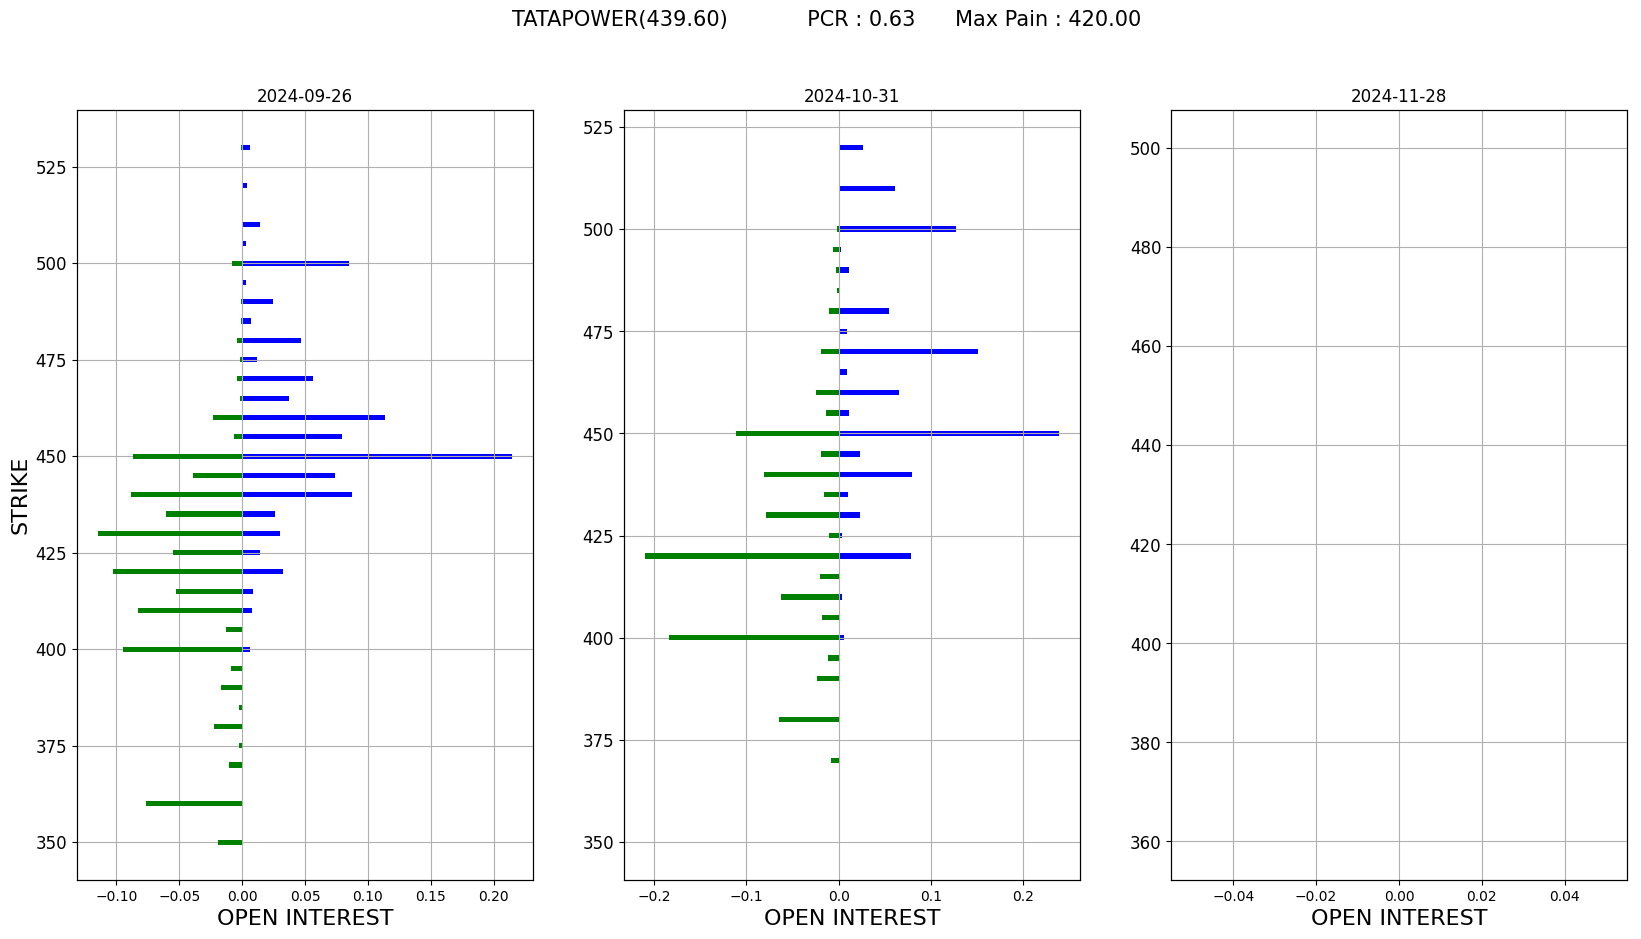

In [18]:
import research.analytics as ra
oitree = ra.level_analysis(['TATAPOWER'])


In [22]:
pd.set_option('display.max_rows', None)
oitree['oi_tree'].columns


Index(['instrument_token', 'tradingsymbol', 'name', 'expiry', 'strike',
       'instrument_type', 'lot_size', 'timestamp', 'last_trade_time',
       'last_price', 'last_quantity', 'buy_quantity', 'sell_quantity',
       'volume', 'average_price', 'oi', 'oi_day_high', 'oi_day_low',
       'net_change', 'lower_circuit_limit', 'upper_circuit_limit', 'ohlc',
       'depth', 'oi_ce2024-09-26', 'oi_pe2024-09-26', 'oi_ce2024-10-31',
       'oi_pe2024-10-31', 'oi_ce2024-11-28', 'oi_pe2024-11-28'],
      dtype='object')